## Importing Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading Dataset

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [30]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [31]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

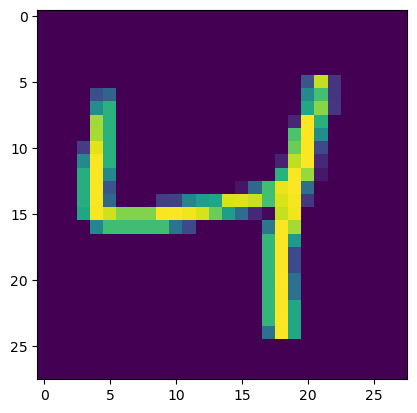

In [32]:
plt.imshow(x_train[2])

In [33]:
y_train[2]

4

In [34]:
x_train.min(), x_train.max()

(0, 255)

Normalizing data 

In [35]:
x_train = x_train/255
x_test = x_test/255

In [36]:
x_train.min(), x_train.max()

(0.0, 1.0)

## Data Modeling

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

D:\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8776 - loss: 0.4177 - val_accuracy: 0.9575 - val_loss: 0.1354
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9687 - loss: 0.1003 - val_accuracy: 0.9648 - val_loss: 0.1194
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9806 - loss: 0.0626 - val_accuracy: 0.9710 - val_loss: 0.0986
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9860 - loss: 0.0450 - val_accuracy: 0.9712 - val_loss: 0.0998
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9714 - val_loss: 0.1037
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9917 - loss: 0.0250 - val_accuracy: 0.9730 - val_loss: 0.1060
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9758 - val_loss: 0.1041
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9937 - loss: 0.0192 

In [14]:
y_prob = model.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.5288385e-08, 3.3776768e-04, 1.2341965e-04, ..., 1.0000000e+00,
        3.0876254e-05, 3.8981615e-03],
       [8.1188496e-08, 5.0895388e-04, 1.0000000e+00, ..., 1.4024730e-09,
        1.4652905e-07, 4.2439901e-14],
       [2.6928049e-06, 9.9999994e-01, 5.0820835e-04, ..., 7.4955869e-01,
        2.8286425e-02, 1.3585120e-07],
       ...,
       [2.3622119e-06, 4.6433966e-06, 6.1966013e-08, ..., 1.7421724e-01,
        3.3993879e-03, 9.9996996e-01],
       [3.6261554e-05, 1.5378193e-10, 7.3221033e-16, ..., 2.2223315e-16,
        9.9994898e-01, 1.9187518e-10],
       [9.6676391e-01, 7.6479733e-04, 2.6807490e-01, ..., 3.9522248e-12,
        2.8220466e-03, 2.1909958e-07]], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## Results

In [16]:
accuracy_score(y_test,y_pred)

0.981

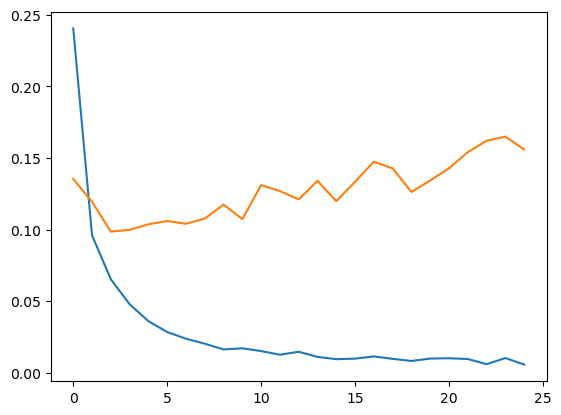

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

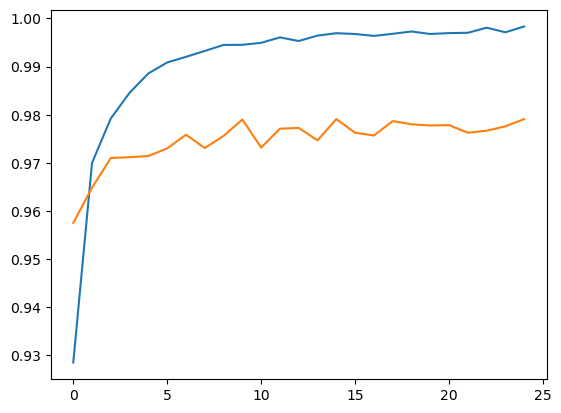

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

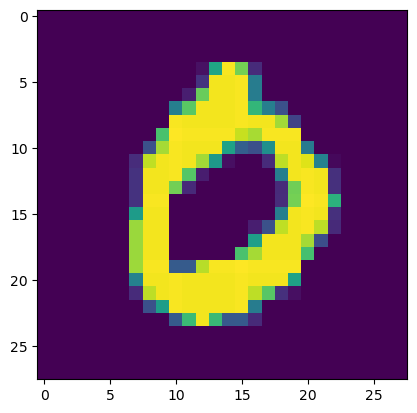

In [19]:
plt.imshow(x_test[3])

In [20]:
model.predict(x_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([0], dtype=int64)

<Axes: >

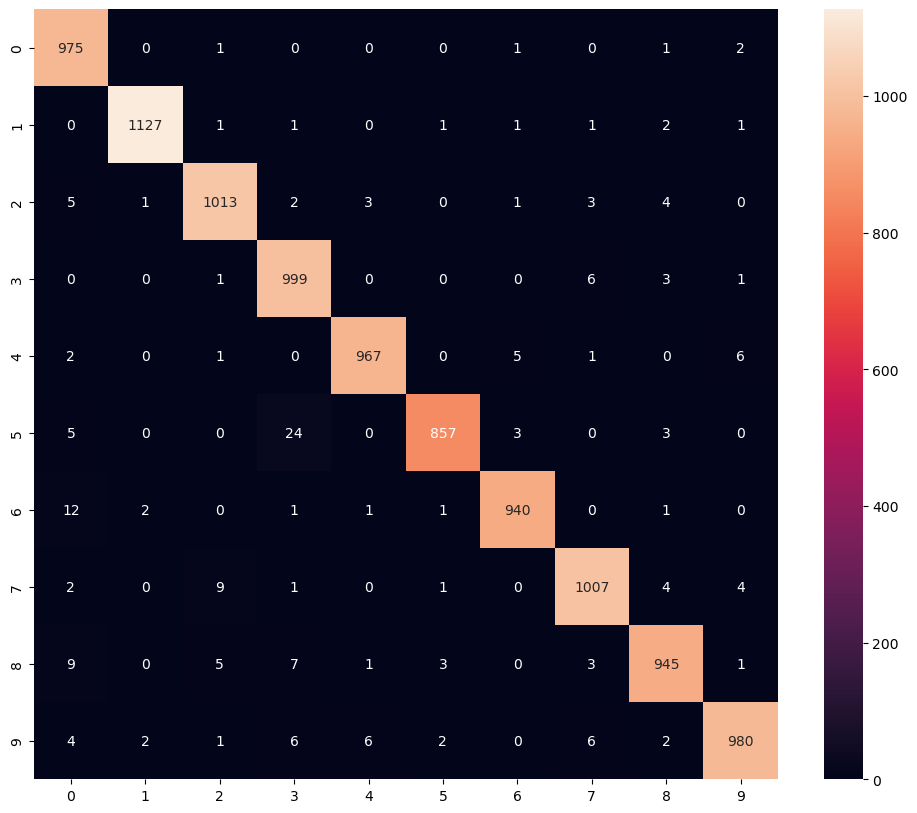

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='.0f')

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

